## Identifying Duplicate Questions

Over 100 million people visit Quora every month, so it's no surprise that many people ask similar (or the same) questions. Various questions with the same intent can cause people to spend extra time searching for the best answer to their question, and results in members answering multiple versions of the same question. Quora uses random forest to identify duplicated questions to provide a better experience to active seekers and writers, and offer more value to both of these groups in the long term.
Follow the steps outlined below to build the appropriate classifier model. 


Steps:
- Download data
- Exploration
- Cleaning
- Feature Engineering
- Modeling

By the end of this project you should have **a presentation that describes the model you built** and its **performance**. 


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("train.csv")

#### Note
There is no designated test.csv file. The train.csv file is the entire dataset. Part of the data in the train.csv file should be set aside to act as the final testing data.

In [3]:
df

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


### Exploration

In [5]:
df.shape

(404290, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [8]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [11]:
## Only two nulls so we will drop them
df = df.dropna()

In [13]:
df.shape

(404287, 6)

In [17]:
df.nunique()

id              404287
qid1            290652
qid2            299362
question1       290455
question2       299173
is_duplicate         2
dtype: int64

In [18]:
## We seem to have more non duplicates than duplicates
df['is_duplicate'].value_counts()

0    255024
1    149263
Name: is_duplicate, dtype: int64

In [2]:
import matplotlib.pyplot as plt

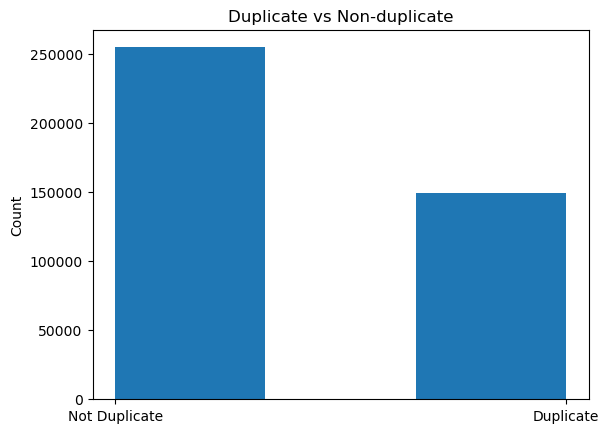

In [13]:
# Plot Duplicate and non-duplicates
plt.hist(df['is_duplicate'])
plt.ylabel('Count')
plt.title('Duplicate vs Non-duplicate')
plt.xticks([0, 1], ['Not Duplicate', 'Duplicate'])
plt.show()

In [ ]:
# df['is_duplicate'].value_counts().plot(kind='bar')
# plt.ylabel('Count')
# plt.title('Duplicate vs Non-duplicate')
# plt.xticks([0, 1], ['Not Duplicate', 'Duplicate'])
# plt.show()

In [29]:
## Make sure the questions are strings
df['question1'] = df['question1'].astype(str)
df['question2'] = df['question2'].astype(str)

In [32]:
df.dtypes

id               int64
qid1             int64
qid2             int64
question1       object
question2       object
is_duplicate     int64
dtype: object

### Cleaning

- Tokenization
- Stopwords cleaning
- Removing punctuation
- Normalizing
- Stemming

In [15]:
import nltk
from nltk.corpus import stopwords
ENGstopwords = stopwords.words('english')

In [16]:
from nltk.stem import PorterStemmer

ps = PorterStemmer() #will remove pre-defined stems

In [22]:
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [36]:
## Tokenization
def tokenize(text):
    tokens = text.split()
    return tokens

## Remove Punctuation
def remove_punct(text):
    text = "".join([char for char in text if char not in string.punctuation])
    return text

## Convert to lower case
def convert_lower (text):
    text = text.lower()
    return text

## Stopword Cleaning
def remove_stopwords(text):
    tokens = text.split()
    text_stopwords_removed = [word for word in tokens if word not in ENGstopwords]
    text_nostop = ''.join([word + ' ' for word in tokens if word not in ENGstopwords])
    return text_nostop

## Stemming
def stem_string(string):
    words = string.split()
    return ' '.join([ps.stem(word) for word in words])

In [37]:
## Define function to preprocess all
function_list = [remove_punct, remove_stopwords, convert_lower]
def preprocess(data):
    for func in function_list:
        data = func(data)
    return data

In [33]:
## Create new dataframe with relevant columns
df_clean = df[['question1', 'question2', 'is_duplicate']]

In [ ]:
## Create clean columns for questions 1 and 2
df_clean['q1_clean'] = df_clean['question1'].apply(lambda x: preprocess(x))

In [ ]:
df_clean['q2_clean'] = df_clean['question2'].apply(lambda x: preprocess(x))

In [41]:
df_clean

,question1,question2,is_duplicate,q1_clean,q2_clean
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,what step step guide invest share market india,what step step guide invest share market
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,what story kohinoor kohinoor diamond,what would happen indian government stole kohi...
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,how i increase speed internet connection using...,how internet speed increased hacking dns
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,why i mentally lonely how i solve,find remainder math2324math divided 2423
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,which one dissolve water quikly sugar salt met...,which fish would survive salt water
...,...,...,...,...,...
404285,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0,how many keywords racket programming language ...,how many keywords perl programming language la...
404286,Do you believe there is life after death?,Is it true that there is life after death?,1,do believe life death,is true life death
404287,What is one coin?,What's this coin?,0,what one coin,whats coin
404288,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0,what approx annual cost living studying uic ch...,i little hairfall problem i want use hair styl...


In [43]:
## Further cleanning by applying stemming to q1 and q2 clean 
df_clean['q1_stem'] = df_clean['q1_clean'].apply(stem_string)

In [44]:
df_clean['q2_stem'] = df_clean['q2_clean'].apply(stem_string)

In [45]:
df_clean

,question1,question2,is_duplicate,q1_clean,q2_clean,q1_stem,q2_stem
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,what step step guide invest share market india,what step step guide invest share market,what step step guid invest share market india,what step step guid invest share market
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,what story kohinoor kohinoor diamond,what would happen indian government stole kohi...,what stori kohinoor kohinoor diamond,what would happen indian govern stole kohinoor...
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,how i increase speed internet connection using...,how internet speed increased hacking dns,how i increas speed internet connect use vpn,how internet speed increas hack dn
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,why i mentally lonely how i solve,find remainder math2324math divided 2423,whi i mental lone how i solv,find remaind math2324math divid 2423
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,which one dissolve water quikly sugar salt met...,which fish would survive salt water,which one dissolv water quikli sugar salt meth...,which fish would surviv salt water
...,...,...,...,...,...,...,...
404285,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0,how many keywords racket programming language ...,how many keywords perl programming language la...,how mani keyword racket program languag latest...,how mani keyword perl program languag latest v...
404286,Do you believe there is life after death?,Is it true that there is life after death?,1,do believe life death,is true life death,do believ life death,is true life death
404287,What is one coin?,What's this coin?,0,what one coin,whats coin,what one coin,what coin
404288,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0,what approx annual cost living studying uic ch...,i little hairfall problem i want use hair styl...,what approx annual cost live studi uic chicago...,i littl hairfal problem i want use hair style ...


In [49]:
# df_clean.to_csv("data_cleaned.csv", index = False)

Note some of the data seems to be wrongly labelled, like the last example, that seems to be a duplicate question but it is labelled as non-duplicate

### Feature Engineering

- tf-idf
- word2vec
- word count
- number of the same words in both questions
- ....

try one with the words stemmed and one without words stemmed?

In [54]:
df_features = df_clean[['is_duplicate', 'q1_clean', 'q2_clean']]

In [55]:
df_features.head()

,is_duplicate,q1_clean,q2_clean
0,0,what step step guide invest share market india,what step step guide invest share market
1,0,what story kohinoor kohinoor diamond,what would happen indian government stole kohi...
2,0,how i increase speed internet connection using...,how internet speed increased hacking dns
3,0,why i mentally lonely how i solve,find remainder math2324math divided 2423
4,0,which one dissolve water quikly sugar salt met...,which fish would survive salt water


In [ ]:
## Create word count columns

## define function to count words
def count_words(string):
    return len(string.split())

## Aplly the function and create columns of word counts
df_features['q1_count'] = df_features['q1_clean'].apply(count_words)
df_features['q2_count'] = df_features['q2_clean'].apply(count_words)

In [62]:
df_features.head()

,is_duplicate,q1_clean,q2_clean,q1_count,q2_count
0,0,what step step guide invest share market india,what step step guide invest share market,8,7
1,0,what story kohinoor kohinoor diamond,what would happen indian government stole kohi...,5,10
2,0,how i increase speed internet connection using...,how internet speed increased hacking dns,8,6
3,0,why i mentally lonely how i solve,find remainder math2324math divided 2423,7,5
4,0,which one dissolve water quikly sugar salt met...,which fish would survive salt water,11,6


In [ ]:
## create word count ratio column
df_features['word_count_ratio'] = df_features['q1_count']/df_features['q2_count']

In [64]:
df_features.head()

,is_duplicate,q1_clean,q2_clean,q1_count,q2_count,word_count_ratio
0,0,what step step guide invest share market india,what step step guide invest share market,8,7,1.142857
1,0,what story kohinoor kohinoor diamond,what would happen indian government stole kohi...,5,10,0.500000
2,0,how i increase speed internet connection using...,how internet speed increased hacking dns,8,6,1.333333
3,0,why i mentally lonely how i solve,find remainder math2324math divided 2423,7,5,1.400000
4,0,which one dissolve water quikly sugar salt met...,which fish would survive salt water,11,6,1.833333


In [67]:
# ## Code testing
# df1 = df_features
# df1['matching_words'] = df1.apply(lambda row: len(set(row['q1_clean'].split()) & set(row['q2_clean'].split())), axis=1)
# df1['percentage_matching_words'] = df1['matching_words'] / ((df1['q1_clean'].apply(lambda x: len(x.split())) + df1['q2_clean'].apply(lambda x: len(x.split()))) / 2) 
# df1

In [69]:
## Create columns number of matching words and percentage of matching words
df_features['matching_words'] = df_features.apply(lambda row: len(set(row['q1_clean'].split()) & set(row['q2_clean'].split())), axis=1)
df_features['percentage_matching_words'] = df_features['matching_words'] / ((df_features['q1_clean'].apply(lambda x: len(x.split())) + df_features['q2_clean'].apply(lambda x: len(x.split()))) / 2) 

In [70]:
df_features

,is_duplicate,q1_clean,q2_clean,q1_count,q2_count,word_count_ratio,matching_words,percentage_matching_words
0,0,what step step guide invest share market india,what step step guide invest share market,8,7,1.142857,6,0.800000
1,0,what story kohinoor kohinoor diamond,what would happen indian government stole kohi...,5,10,0.500000,3,0.400000
2,0,how i increase speed internet connection using...,how internet speed increased hacking dns,8,6,1.333333,3,0.428571
3,0,why i mentally lonely how i solve,find remainder math2324math divided 2423,7,5,1.400000,0,0.000000
4,0,which one dissolve water quikly sugar salt met...,which fish would survive salt water,11,6,1.833333,3,0.352941
...,...,...,...,...,...,...,...,...
404285,0,how many keywords racket programming language ...,how many keywords perl programming language la...,8,8,1.000000,7,0.875000
404286,1,do believe life death,is true life death,4,4,1.000000,2,0.500000
404287,0,what one coin,whats coin,3,2,1.500000,1,0.400000
404288,0,what approx annual cost living studying uic ch...,i little hairfall problem i want use hair styl...,10,17,0.588235,0,0.000000


In [39]:
# df_features.to_csv("features.csv", index = False)

In [12]:
# df_features = pd.read_csv("features.csv")
# df_features['q1_clean'] = df_features['q1_clean'].astype(str)
# df_features['q2_clean'] = df_features['q2_clean'].astype(str)

Cosine Similarity --> https://www.quora.com/Natural-Language-Processing-How-do-you-calculate-cosine-similarity-between-two-sentences

Effectiveness? --> https://www.quora.com/Is-cosine-similarity-effective

In [7]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
tvect = TfidfVectorizer()

In [9]:
## Define function to calculate cosine similarity --> metric to determine how similar two vectors are
def get_cosine_similarity(row):
    q1 = row['q1_clean']
    q2 = row['q2_clean']
    vectors = [q1, q2]
    tvect = TfidfVectorizer().fit_transform(vectors)
    return ((tvect * tvect.T).A)[0,1]

In [ ]:
# ## Do a test run 
# df_test = df_features
# df_test['cosine_similarity'] = df_test.apply(get_cosine_similarity, axis=1)
# df_test

In [18]:
df_features['cosine_similarity'] = df_features.apply(get_cosine_similarity, axis=1)

In [19]:
df_features

,is_duplicate,q1_clean,q2_clean,q1_count,q2_count,word_count_ratio,matching_words,percentage_matching_words,cosine_similarity
0,0,what step step guide invest share market india,what step step guide invest share market,8,7,1.142857,6,0.800000,0.905550
1,0,what story kohinoor kohinoor diamond,what would happen indian government stole kohi...,5,10,0.500000,3,0.400000,0.502844
2,0,how i increase speed internet connection using...,how internet speed increased hacking dns,8,6,1.333333,3,0.428571,0.304126
3,0,why i mentally lonely how i solve,find remainder math2324math divided 2423,7,5,1.400000,0,0.000000,0.000000
4,0,which one dissolve water quikly sugar salt met...,which fish would survive salt water,11,6,1.833333,3,0.352941,0.231571
...,...,...,...,...,...,...,...,...,...
404285,0,how many keywords racket programming language ...,how many keywords perl programming language la...,8,8,1.000000,7,0.875000,0.779915
404286,1,do believe life death,is true life death,4,4,1.000000,2,0.500000,0.336097
404287,0,what one coin,whats coin,3,2,1.500000,1,0.400000,0.260556
404288,0,what approx annual cost living studying uic ch...,i little hairfall problem i want use hair styl...,10,17,0.588235,0,0.000000,0.000000


In [36]:
## 3 infinite values for some reason, might have been 0 divided by zero
print(df_features.isin([np.inf, -np.inf]).sum())

is_duplicate                 0
q1_clean                     0
q2_clean                     0
q1_count                     0
q2_count                     0
word_count_ratio             3
matching_words               0
percentage_matching_words    0
cosine_similarity            0
dtype: int64


In [37]:
## lets Just remove those rows
df_features = df_features.replace([np.inf, -np.inf], np.nan).dropna()

In [38]:
df_features

,is_duplicate,q1_clean,q2_clean,q1_count,q2_count,word_count_ratio,matching_words,percentage_matching_words,cosine_similarity
0,0,what step step guide invest share market india,what step step guide invest share market,8,7,1.142857,6,0.800000,0.905550
1,0,what story kohinoor kohinoor diamond,what would happen indian government stole kohi...,5,10,0.500000,3,0.400000,0.502844
2,0,how i increase speed internet connection using...,how internet speed increased hacking dns,8,6,1.333333,3,0.428571,0.304126
3,0,why i mentally lonely how i solve,find remainder math2324math divided 2423,7,5,1.400000,0,0.000000,0.000000
4,0,which one dissolve water quikly sugar salt met...,which fish would survive salt water,11,6,1.833333,3,0.352941,0.231571
...,...,...,...,...,...,...,...,...,...
404285,0,how many keywords racket programming language ...,how many keywords perl programming language la...,8,8,1.000000,7,0.875000,0.779915
404286,1,do believe life death,is true life death,4,4,1.000000,2,0.500000,0.336097
404287,0,what one coin,whats coin,3,2,1.500000,1,0.400000,0.260556
404288,0,what approx annual cost living studying uic ch...,i little hairfall problem i want use hair styl...,10,17,0.588235,0,0.000000,0.000000


### Modeling

Different modeling techniques can be used:

- logistic regression
- XGBoost
- LSTMs
- etc

In [3]:
# df_features = pd.read_csv("features.csv")


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

In [6]:
X = df_features[['word_count_ratio','matching_words','percentage_matching_words','cosine_similarity']]
y = df_features['is_duplicate']

In [7]:
## Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=84)

In [38]:
## instantiate models
model_lr = LogisticRegression()
model_rfc = RandomForestClassifier()
model_svc = SVC()
model_xgb = XGBClassifier()

## Logistic Regression

In [42]:
model_lr.fit(X_train,y_train)
y_pred_train = model_lr.predict(X_train)
y_pred_test = model_lr.predict(X_test)

In [43]:
acc_score_train = accuracy_score(y_train, y_pred_train)
acc_score_test = accuracy_score(y_test, y_pred_test)
f1_score_train = f1_score(y_train, y_pred_train, average = 'macro')
f1_score_test = f1_score(y_test, y_pred_test, average = 'macro')

print("The train accuracy score is: ",  acc_score_train)
print("The test accuracy score is: ",  acc_score_test)
print("The train f1 score is: ",  f1_score_train)
print("The test f1 score is: ",  f1_score_test)

The train accuracy score is:  0.6644628975265018
The test accuracy score is:  0.6647291135900797
The train f1 score is:  0.6275716808315701
The test f1 score is:  0.6271983731795365


## SVC

Takes too long...

In [ ]:
# model_svc.fit(X_train,y_train)
# y_pred_train = model_svc.predict(X_train)
# y_pred_test = model_svc.predict(X_test)

In [ ]:
# acc_score_train = accuracy_score(y_train, y_pred_train)
# acc_score_test = accuracy_score(y_test, y_pred_test)
# f1_score_train = f1_score(y_train, y_pred_train, average = 'macro')
# f1_score_test = f1_score(y_test, y_pred_test, average = 'macro')

# print("The train accuracy score is: ",  acc_score_train)
# print("The test accuracy score is: ",  acc_score_test)
# print("The train f1 score is: ",  f1_score_train)
# print("The test f1 score is: ",  f1_score_test)

## Random Forest

In [26]:
model_rfc.fit(X_train,y_train)
y_pred_train = model_rfc.predict(X_train)
y_pred_test = model_rfc.predict(X_test)

In [27]:
acc_score_train = accuracy_score(y_train, y_pred_train)
acc_score_test = accuracy_score(y_test, y_pred_test)
f1_score_train = f1_score(y_train, y_pred_train, average = 'macro')
f1_score_test = f1_score(y_test, y_pred_test, average = 'macro')

print("The train accuracy score is: ",  acc_score_train)
print("The test accuracy score is: ",  acc_score_test)
print("The train f1 score is: ",  f1_score_train)
print("The test f1 score is: ",  f1_score_test)

The train accuracy score is:  0.7367950530035335
The test accuracy score is:  0.7092186301911994
The train f1 score is:  0.7212093522646148
The test f1 score is:  0.6921424904357636


In [18]:
## GridSearch
# params_dict = {
#                 'n_estimators':[50,100],
#                 'max_depth' : [5,10,15],
#                 'max_features':[2,4],
#                 }

# rfc_search = GridSearchCV(estimator = model_rfc,
#                            param_grid = params_dict,                        
#                            n_jobs = -1,
#                            verbose = 1)
# rfc_search.fit(X_train,y_train)

# rfc_search.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


{'max_depth': 15, 'max_features': 2, 'n_estimators': 100}

## XGBoost

In [39]:
model_xgb.fit(X_train,y_train)
y_pred_train = model_xgb.predict(X_train)
y_pred_test = model_xgb.predict(X_test)

In [40]:
acc_score_train = accuracy_score(y_train, y_pred_train)
acc_score_test = accuracy_score(y_test, y_pred_test)
f1_score_train = f1_score(y_train, y_pred_train, average = 'macro')
f1_score_test = f1_score(y_test, y_pred_test, average = 'macro')

print("The train accuracy score is: ",  acc_score_train)
print("The test accuracy score is: ",  acc_score_test)
print("The train f1 score is: ",  f1_score_train)
print("The test f1 score is: ",  f1_score_test)

The train accuracy score is:  0.7173003533568905
The test accuracy score is:  0.7119806739386744
The train f1 score is:  0.7023712441085505
The test f1 score is:  0.6969398723192675


In [ ]:
# ## GridSearch
# params_dict = {
#                 'learning_rate':[0.01,0.1],
#                 'colsample_bytree': [0.3,0.6,0.9],
#                 'n_estimators':[100,200,300],
#                 'max_depth':[10,15],
#                 'alpha':[5,10],
#                 'objective': ['binary:logistic']}

# xgb_search = GridSearchCV(estimator = model_xgb,
#                            param_grid = params_dict,                        
#                            n_jobs = -1,
#                            verbose = 1)
# xgb_search.fit(X_train,y_train)
# xgb_search.best_score_
# xgb_search.best_params_

### Dealing with Class imbalance with SMOTE

In [43]:
from imblearn.over_sampling import SMOTE

In [44]:
## Balance with SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

print(X_res.shape)
y_res.value_counts()

(357032, 4)


0    178516
1    178516
Name: is_duplicate, dtype: int64

In [45]:
## Logistic Regression
model_lr.fit(X_res,y_res)
y_pred_train = model_lr.predict(X_train)
y_pred_test = model_lr.predict(X_test)

acc_score_train = accuracy_score(y_train, y_pred_train)
acc_score_test = accuracy_score(y_test, y_pred_test)
f1_score_train = f1_score(y_train, y_pred_train, average = 'macro')
f1_score_test = f1_score(y_test, y_pred_test, average = 'macro')

print("The train accuracy score is: ",  acc_score_train)
print("The test accuracy score is: ",  acc_score_test)
print("The train f1 score is: ",  f1_score_train)
print("The test f1 score is: ",  f1_score_test)

The train accuracy score is:  0.674904593639576
The test accuracy score is:  0.6752908390841558
The train f1 score is:  0.6687575406630246
The test f1 score is:  0.6690586892107173


In [46]:
## Random Forest
model_rfc.fit(X_res,y_res)
y_pred_train = model_rfc.predict(X_train)
y_pred_test = model_rfc.predict(X_test)

acc_score_train = accuracy_score(y_train, y_pred_train)
acc_score_test = accuracy_score(y_test, y_pred_test)
f1_score_train = f1_score(y_train, y_pred_train, average = 'macro')
f1_score_test = f1_score(y_test, y_pred_test, average = 'macro')

print("The train accuracy score is: ",  acc_score_train)
print("The test accuracy score is: ",  acc_score_test)
print("The train f1 score is: ",  f1_score_train)
print("The test f1 score is: ",  f1_score_test)

The train accuracy score is:  0.719208480565371
The test accuracy score is:  0.6950951049988869
The train f1 score is:  0.7176516914907384
The test f1 score is:  0.6934807764127868


In [47]:
## XGBoost
model_xgb.fit(X_res,y_res)
y_pred_train = model_xgb.predict(X_train)
y_pred_test = model_xgb.predict(X_test)

acc_score_train = accuracy_score(y_train, y_pred_train)
acc_score_test = accuracy_score(y_test, y_pred_test)
f1_score_train = f1_score(y_train, y_pred_train, average = 'macro')
f1_score_test = f1_score(y_test, y_pred_test, average = 'macro')

print("The train accuracy score is: ",  acc_score_train)
print("The test accuracy score is: ",  acc_score_test)
print("The train f1 score is: ",  f1_score_train)
print("The test f1 score is: ",  f1_score_test)

The train accuracy score is:  0.6951448763250884
The test accuracy score is:  0.6929102047210336
The train f1 score is:  0.6943156074576391
The test f1 score is:  0.6920454863900956


### Deal with class imbalance through undersampling

In [52]:
## Create new dataframe with balanced classes --> Do this by undersampling, excluding certain rows
no_rows = df_features[df_features['is_duplicate'] == 0]
yes_rows = df_features[df_features['is_duplicate'] == 1]

num_no_rows = len(no_rows)
num_yes_rows = len(yes_rows)

if num_no_rows > num_yes_rows:
    no_rows = no_rows.sample(n=num_yes_rows)

df_balanced = pd.concat([no_rows, yes_rows])


In [56]:
df_balanced.value_counts('is_duplicate')

is_duplicate
0    149263
1    149263
dtype: int64

In [69]:
df_balanced = df_balanced.reset_index(drop=True)

In [72]:
print(Xb.shape)
print(yb.shape)

(298526, 4)
(298526,)


In [70]:
Xb = df_balanced[['word_count_ratio','matching_words','percentage_matching_words','cosine_similarity']]
yb = df_balanced['is_duplicate']

In [74]:
Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, test_size=0.3, stratify = yb, random_state=88)

In [75]:
## Random Forest
model_rfc.fit(Xb_train,yb_train)
y_pred_train = model_rfc.predict(Xb_train)
y_pred_test = model_rfc.predict(Xb_test)

acc_score_train = accuracy_score(yb_train, y_pred_train)
acc_score_test = accuracy_score(yb_test, y_pred_test)
f1_score_train = f1_score(yb_train, y_pred_train, average = 'macro')
f1_score_test = f1_score(yb_test, y_pred_test, average = 'macro')

print("The train accuracy score is: ",  acc_score_train)
print("The test accuracy score is: ",  acc_score_test)
print("The train f1 score is: ",  f1_score_train)
print("The test f1 score is: ",  f1_score_test)

The train accuracy score is:  0.7549289843421002
The test accuracy score is:  0.7229393242368074
The train f1 score is:  0.751137848737484
The test f1 score is:  0.7186617840267859


In [ ]:
## XGBoost
model_xgb.fit(Xb_train,yb_train)
y_pred_train = model_xgb.predict(Xb_train)
y_pred_test = model_xgb.predict(Xb_test)

acc_score_train = accuracy_score(yb_train, y_pred_train)
acc_score_test = accuracy_score(yb_test, y_pred_test)
f1_score_train = f1_score(yb_train, y_pred_train, average = 'macro')
f1_score_test = f1_score(yb_test, y_pred_test, average = 'macro')

print("The train accuracy score is: ",  acc_score_train)
print("The test accuracy score is: ",  acc_score_test)
print("The train f1 score is: ",  f1_score_train)
print("The test f1 score is: ",  f1_score_test)